In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_1samp
clist = []
for cname in ["winter", "spring"]:
    c = cm.get_cmap(cname, 100)
    clist.append(ListedColormap(c(np.linspace(0, 1, 80))))

# Importing the data

In [3]:
#define paths
p = os.getcwd()
parent = os.path.dirname(p)
relative = "/Exp 10/data/"
path = parent+relative
fileExt = ".txt"
startStr1 = "jatos"
startStr2 = "study"
startStr3 = "comp"
# list the name of the files in the current folder
files = os.listdir(path)
DATA = []
for file in files:
    if file.startswith(startStr1):
        #print(file)
        subjectFiles = os.listdir(path+file)
        #print(subjectFiles)
        for subjectFile in subjectFiles:
            if subjectFile.startswith(startStr2):
                #print(subjectFile)
                subjectTxtFiles = os.listdir(path+file+"/"+subjectFile)
                #print(subjectTxtFiles)
                for subjectTxtFile in subjectTxtFiles:
                    if subjectTxtFile.startswith(startStr3):
                        fileName = os.listdir(path+file+"/"+subjectFile+"/"+subjectTxtFile)
                        #print(fileName)
                        # Load the JSON data from the text file
                        with open(path+file+"/"+subjectFile+"/"+subjectTxtFile+"/"+fileName[0], "r") as f:
                            json_data = json.load(f)
                        # Create a DataFrame from the JSON data
                        DATA.append([pd.DataFrame(json_data[cName]) for cName in json_data.keys()])
print(DATA[0][0].columns)

Index(['ID_name', 'block', 'color', 'condition', 'correct_keyboard_response',
       'number', 'practice', 'response_keyboard_response',
       'response_time_keyboard_response', 'subject_nr'],
      dtype='object')


In [4]:
my_list = []
for i in range(len(DATA)):
    my_list.append(DATA[i][0]["ID_name"][0])

In [5]:
def write_list_to_file(lst, filename):
    with open(filename, 'w') as file:
        for item in lst:
            file.write(item + '\n')

# Example usage

file_name = 'jeligek.txt'
write_list_to_file(my_list, file_name)
print(f'Successfully written the list to {file_name}.')


Successfully written the list to jeligek.txt.


In [6]:
[DATA[i][0].to_csv("log"+str(i)+".csv", index=False) for i in range(len(DATA))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
# import a log fajlokat, hogy megnezni az ID-kat es hol keveredik

# Looking at the training trials

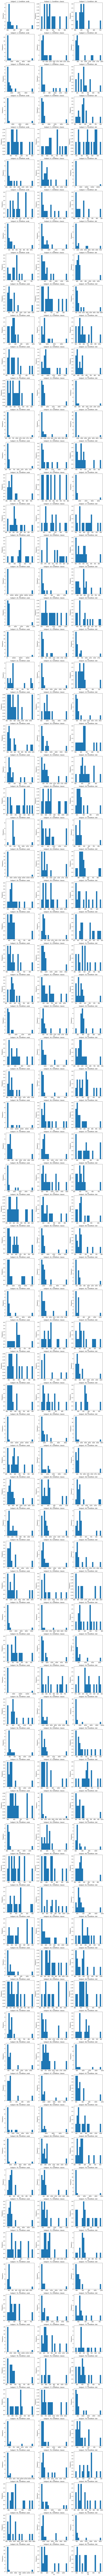

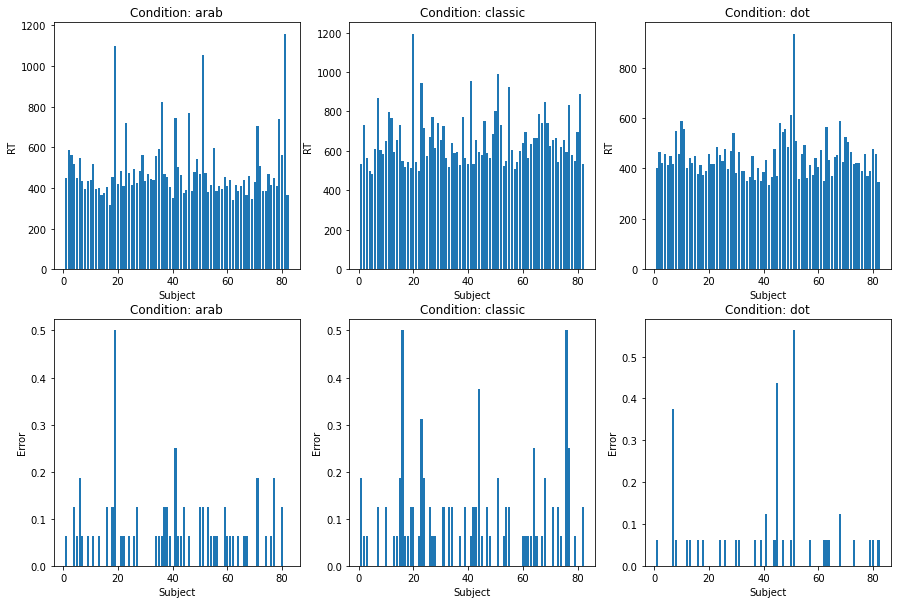

In [8]:
condType = np.unique(DATA[0][0]['condition'])
respType = np.unique(DATA[0][0]['response_keyboard_response'])
n,m = len(DATA), len(condType)
# saving the results for RT and Errors
practice_results = np.zeros((n, m, 2))
# plot the results
figRT, axRT = plt.subplots(n, m, figsize=(m*5,n*5))
axRT = axRT.flatten()
# looping over the subjects
for di, data in enumerate(DATA):
    data = data[0]
    practice_data = data[data['practice'] == "yes"]
    condType = np.unique(data['condition'])
    for ci, c in enumerate(condType):
        #print("Condition: ", c)
        cdata = practice_data[practice_data['condition'] == c]
        # create an RT and an error table
        RT = cdata
        Err = cdata 
        # remove error trials from RT table
        RT = RT[RT['correct_keyboard_response'] == 1]
        # compute correct response
        practice_results[di,ci,0] = np.median(RT['response_time_keyboard_response'])
        practice_results[di,ci,1] = 1-np.mean(Err['correct_keyboard_response'])
        # plot the results
        axRT[di*m+ci].hist(RT['response_time_keyboard_response'], bins=20)
        axRT[di*m+ci].set_title("Subject: "+str(di+1)+", Condition: "+c)
        axRT[di*m+ci].set_xlabel("RT")
        axRT[di*m+ci].set_ylabel("Frequency")
plt.show()

# plot the results
fig, ax = plt.subplots(2, m, figsize=(m*5,2*5))
ax = ax.flatten()
for ci, c in enumerate(condType):
    ax[ci].bar(np.arange(n)+1, practice_results[:,ci,0])
    ax[ci].set_title("Condition: "+c)
    ax[ci].set_xlabel("Subject")
    ax[ci].set_ylabel("RT")
    ax[ci+m].bar(np.arange(n)+1, practice_results[:,ci,1])
    ax[ci+m].set_title("Condition: "+c)
    ax[ci+m].set_xlabel("Subject")
    ax[ci+m].set_ylabel("Error")
plt.show()

        


# Excluding subjects with high error rates

Ghost classic 0.5089285714285714
Greenballs arab 0.8020833333333334
Greenballs classic 0.7723214285714286
AYDGHZ dot 0.5
asd15243 arab 0.47916666666666674
asd15243 classic 0.4910714285714286
asd15243 dot 0.75
rox2002 classic 0.8258928571428571


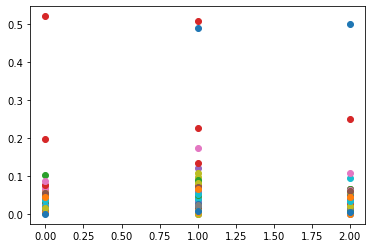

subjects excluded:  [['Ghost', 'Greenballs', 'Greenballs', 'AYDGHZ', 'asd15243', 'asd15243', 'asd15243', 'rox2002'], [20, 43, 43, 50, 63, 63, 63, 76]]
subjects included:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49
 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74 75
 77 78 79 80 81]
number of subjects:  77


In [9]:
ERR = np.zeros((len(DATA), len(condType)))
outlier_ix = [[],[]]
for di, data in enumerate(DATA):
    data = data[0]
    data = data[data['practice'] == "no"]
    #display(data.head())
    for ci, c in enumerate(condType):
        #print("Condition: ", c)
        cdata = data[data['condition'] == c]
        # summary stat on Errors
        ERR[di,ci] = 1-np.mean(cdata['correct_keyboard_response'])
        if ERR[di,ci] > 0.15:
            outlier_ix[1].append(di)
            outlier_ix[0].append(DATA[di][0]['ID_name'][0])
            print(DATA[di][0]['ID_name'][0], c, 1-ERR[di,ci])
plt.plot(ERR.T, "o")
plt.show()
# 15 % error rate should be the threshold
#ix = np.unique(np.where(ERR>0.99)[0]) # numpy messes up the indices
print("subjects excluded: ", outlier_ix)
# remaining subjects
included_ix = np.setdiff1d(np.arange(len(DATA)), np.unique(outlier_ix[1]))
print("subjects included: ", included_ix)
DATA = [DATA[i] for i in included_ix]
N = len(DATA)
print("number of subjects: ", N)


# Analyzing the SNARC effects in the three conditions

In [10]:
def linReg(xT,yT):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), yT)

Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition:  dot
Condition:  arab
Condition:  classic
Condition

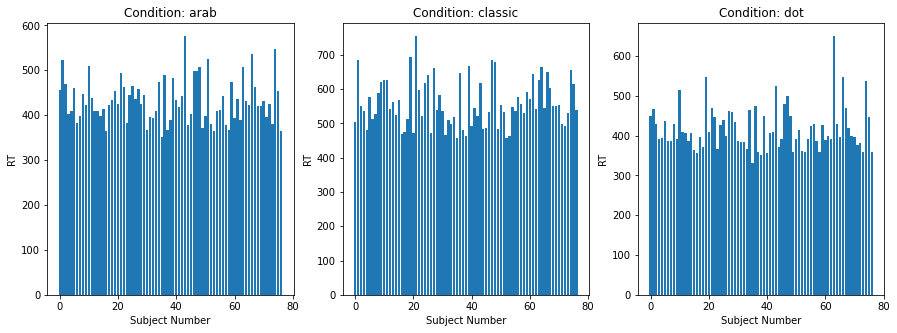

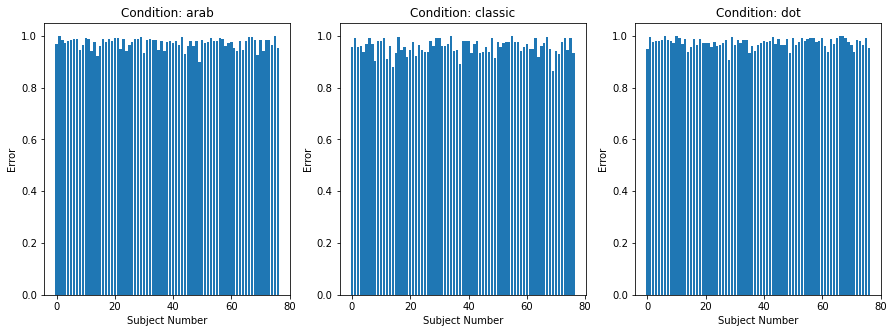

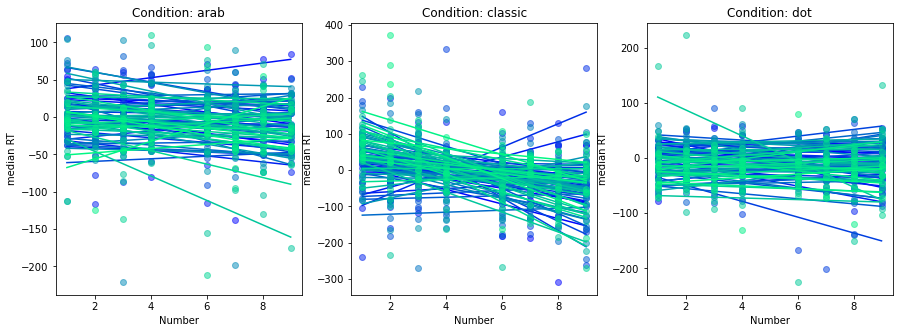

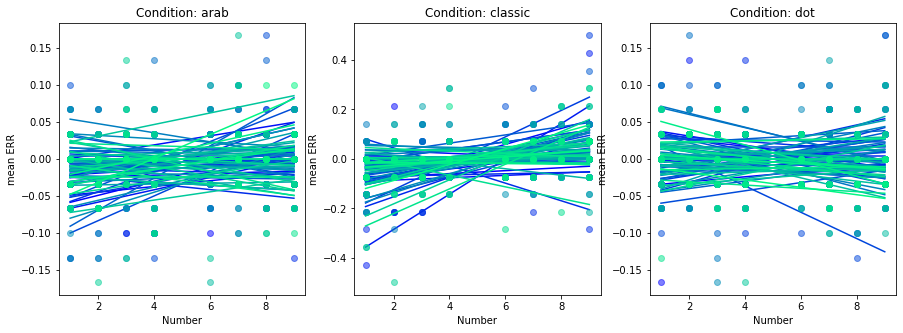

In [31]:
# predictiors for the regression
Xs = np.unique(data['number'])
xT = np.stack((np.ones(len(Xs)), Xs), axis=-1)
# saving the results for RT and Errors
diff_results = np.zeros((len(DATA), len(condType), 2, 2))
diff_results_data = np.zeros((len(DATA), len(condType), 2, 8))
descriptive_stats = np.zeros((len(DATA), len(condType), 2))
het_results = np.zeros((len(DATA), len(condType), 4, 2))
extracted_results = np.zeros((len(DATA), len(condType), 8, 8))
split_het_results = np.zeros((len(DATA), len(condType), 3, 4, 2))
# looping over the subjects
for di, data in enumerate(DATA):
    data = data[0]
    # removing the training trials
    data = data[data['practice'] == "no"]
    #display(data.head())
    # deleting very long and very short responses
    # plotting the data before
    #data = data[(data['response_time_keyboard_response']>200) & (data['response_time_keyboard_response']<2000)]
    # splitting the data into three conditions
    for ci, c in enumerate(condType):
        print("Condition: ", c)
        cdata = data[data['condition'] == c]
        # create an RT and an error table
        RT = cdata
        Err = cdata
        # remove error trials from RT table
        RT = RT[RT['correct_keyboard_response'] == 1]
        # create a pivot table to get the median of the response times for each numbers
        pivotRT_count = pd.pivot_table(RT, index=['ID_name'], columns=['number','response_keyboard_response'], values=['subject_nr'], aggfunc='count')
        #display(pivotRT_count)
        pivotRT = pd.pivot_table(RT, index=['ID_name'], columns=['number','response_keyboard_response'], values=['response_time_keyboard_response'], aggfunc=[np.median])
        #display(pivotRT)
        
        # compute correct response
        correct_response = [t if c==1 else respType[respType!=t][0]
                            for c,t in zip(Err['correct_keyboard_response'], Err['response_keyboard_response'])]
        # correct response or response_keyboard_response for error analysis?? now I changed to response_keyboard_response
        Err = Err.assign(correct_response=correct_response)
        error = [c for c in Err['correct_keyboard_response']] # here I can change to 1-Err['correct_keyboard_response'] to get the error rate
        Err = Err.assign(error=error)
        #display(Err.head())
        # summary stat on Errors
        ky = 'correct_response' #TODO: check which is correct
        pivotErr_count = pd.pivot_table(Err, index=['ID_name'], columns=['number',ky], values=['subject_nr'], aggfunc='count')
        #display(pivotErr_count)
        pivotErr = pd.pivot_table(Err, index=['ID_name'], columns=['number',ky], values=['error'], aggfunc=[np.mean])
        #display(pivotErr)
        ii=0
        for saveVar,side,vari in zip([pivotErr_count, pivotErr, pivotErr_count, pivotErr, pivotRT_count, pivotRT, pivotRT_count, pivotRT],
                           [0,0,1,1,0,0,1,1],
                           range(8)):
            extracted_results[di,ci,vari,:] = [(saveVar.values[0, int(i+side)]) for i in range(0, saveVar.shape[1], 2)]
            if vari%2 == 1:
                het_results[di,ci,ii,:] = linReg(xT,extracted_results[di,ci,vari,:])
                ii = ii+1
         # descriptive stats
        descriptive_stats[di,ci,0] = np.median(RT['response_time_keyboard_response'])
        descriptive_stats[di,ci,1] = np.mean(Err['error'])
        #d_diff, d_reg = [], []
        for dii,d in enumerate([pivotRT, pivotErr]):
            diff = [(d.values[0, i+1] - d.values[0, i]) for i in range(0, pivotErr.shape[1], 2)]
            #d_diff.append(diff)
            #print(diff)
            # for i in range(0, pivotErr.shape[1], 2):
            #     print(i, d.values[:, i+1], d.values[:, i], d.values[:, i+1] - d.values[:, i])
            # fit linear regression on the differences
            #d_reg.append(linReg(xT, diff))
            diff_results[di,ci,dii,:] = linReg(xT, diff)
            diff_results_data[di,ci,dii,:] = diff

        # split data for cheking reliability
        if ci!=1:
            splitRT = [RT[RT['block'] == i] for i in np.unique(RT['block'])]
            splitpivotRT = [pd.pivot_table(s, index=['ID_name'], columns=['number','response_keyboard_response'], values=['response_time_keyboard_response'], aggfunc=[np.median])
                            for s in splitRT]
            splitErr = [Err[Err['block'] == i] for i in np.unique(Err['block'])]
            splitpivotErr = []
            for s in splitErr:
                # compute correct response
                correct_response = [t if c==1 else respType[respType!=t][0]
                                    for c,t in zip(s['correct_keyboard_response'], s['response_keyboard_response'])]
                # correct response or response_keyboard_response for error analysis?? now I changed to response_keyboard_response
                s = s.assign(correct_response=correct_response)
                error = [c for c in s['correct_keyboard_response']] # here I can change to 1-Err['correct_keyboard_response'] to get the error rate
                s = s.assign(error=error)
                #display(pd.pivot_table(s, index=['ID_name'], columns=['number',ky], values=['error'], aggfunc='count'))
                splitpivotErr.append(pd.pivot_table(s, index=['ID_name'], columns=['number',ky], values=['error'], aggfunc=[np.mean]))
            for saveVar,side,vari in zip([splitpivotErr,splitpivotErr,splitpivotRT,splitpivotRT],
                            [0,1,0,1],
                            range(4)):
                for ii,saveV in enumerate(saveVar):
                    ys = [(saveV.values[0, int(i+side)]) for i in range(0, saveV.shape[1], 2)]
                    split_het_results[di,ci,ii,vari,:] = linReg(xT,ys)

# plot the median RTs
X = np.arange(N)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for ci, c in enumerate(condType):
    ax[ci].bar(X, descriptive_stats[:,ci,0])
    ax[ci].set_title("Condition: "+c)
    ax[ci].set_xlabel("Subject Number")
    ax[ci].set_ylabel("RT")
plt.show()
# plot the mean Errors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for ci, c in enumerate(condType):
    ax[ci].bar(X, descriptive_stats[:,ci,1])
    ax[ci].set_title("Condition: "+c)
    ax[ci].set_xlabel("Subject Number")
    ax[ci].set_ylabel("Error")
# plot the difference between the three conditions RTs
cols = ['r','b','g']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for ci, c in enumerate(condType):
    for s in range(N):
        ax[ci].plot(Xs, diff_results_data[s,ci,0,:], "o", color=clist[0](s), alpha=0.5)
        ax[ci].plot(Xs, Xs*diff_results[s,ci,0,1] + diff_results[s,ci,0,0], "-", color=clist[0](s), label="Subject "+str(s+1))
    ax[ci].set_title("Condition: "+c)
    ax[ci].set_xlabel("Number")
    ax[ci].set_ylabel("median RT")
    #ax[ci].legend()
plt.show()
# plot the difference between the three conditions ERRs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for ci, c in enumerate(condType):
    for s in range(N):
        ax[ci].plot(Xs, diff_results_data[s,ci,1,:], "o", color=clist[0](s), alpha=0.5)
        ax[ci].plot(Xs, Xs*diff_results[s,ci,1,1] + diff_results[s,ci,1,0], "-", color=clist[0](s), label="Subject "+str(s+1))
    ax[ci].set_title("Condition: "+c)
    ax[ci].set_xlabel("Number")
    ax[ci].set_ylabel("mean ERR")
    #ax[ci].legend()
plt.show()


# RTs

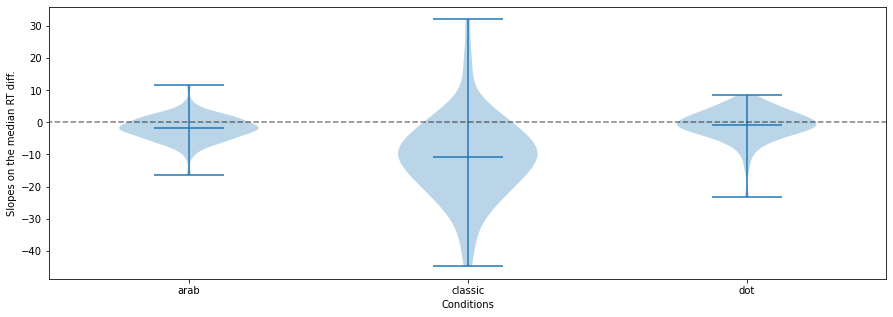

Ttest_1sampResult(statistic=-4.148728945075029, pvalue=8.630780951479458e-05) Ttest_1sampResult(statistic=-7.595256532383438, pvalue=6.530795499739162e-11) Ttest_1sampResult(statistic=-1.4186210195542706, pvalue=0.16009744921194874)
Ttest_1sampResult(statistic=-4.9037682625088745, pvalue=5.413001186356941e-06)
Ttest_1sampResult(statistic=-9.41739667394325, pvalue=3.505984076630307e-14)
Ttest_1sampResult(statistic=-0.3963421376843112, pvalue=0.693008824425635)


In [32]:

notation = 0
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.violinplot([diff_results[:,0,notation,1],diff_results[:,1,notation,1],diff_results[:,2,notation,1]], showmedians=True, showextrema=True)
ax.plot([0,1,2,3,4],[0,0,0,0,0], "--", color="k", alpha=0.5)
ax.set_xlabel("Conditions")
ax.set_ylabel("Slopes on the median RT diff.")
ax.set_xticks([1,2,3])
ax.set_xticklabels(condType)
ax.set_xlim(0.5,3.5)
#ax[ci].legend()
plt.show()
print(ttest_1samp(diff_results[:,0,notation,1],0),ttest_1samp(diff_results[:,1,notation,1],0),ttest_1samp(diff_results[:,2,notation,1],0))
# excluding outliers
thr = 2.5
for ci,c in enumerate(condType):
    med = np.median(diff_results[:,ci,notation,1])
    MAD = thr*np.median(np.abs(diff_results[:,ci,notation,1] - med)) / 0.6744897501960817
    y = diff_results[(diff_results[:,ci,notation,1] < (med + MAD)) & (diff_results[:,ci,notation,1] > (med - MAD)),ci,notation,1]
    print(ttest_1samp(y,0))
# sima index
# outlier szures
# median +- 2.5 med
# dual index - 2 d ben
# mahalonobis distance; 2d; and cases beyond the .05 chi squared cut-off will be excluded

0.19750698899981153
[-9.79899204  0.63214096]
0.15730232479791542
[-0.12607548  0.06125668]
0.10495437188256765
[-1.80729223  0.0842075 ]


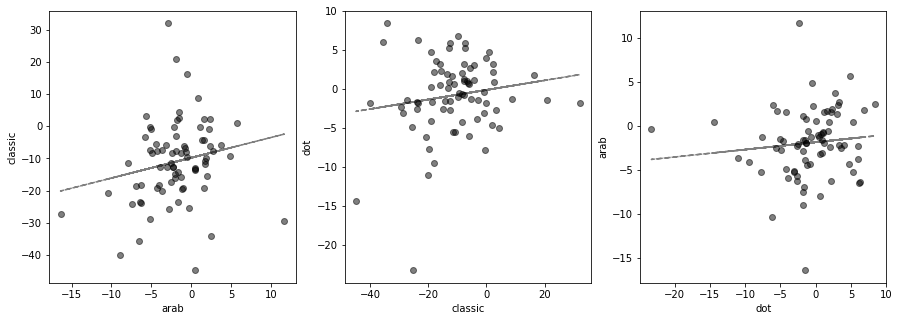

In [33]:
notation = 0
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for p,x,y,lx,ly in zip(range(3),
            [diff_results[:,0,notation,1],diff_results[:,1,notation,1],diff_results[:,2,notation,1]],
            [diff_results[:,1,notation,1],diff_results[:,2,notation,1],diff_results[:,0,notation,1]],
            condType,
            [condType[1],condType[2],condType[0]]):
    ax[p].scatter(x,y, color="k", alpha=0.5)
    xT = np.stack((np.ones(len(x)), x), axis=-1)
    reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
    ax[p].plot(x, x*reg[1] + reg[0], "--", color="k", alpha=0.5)
    ax[p].set_xlabel(lx)
    ax[p].set_ylabel(ly)
    #ax[p].set_xticks([1,2,3])
    #ax[p].set_xticklabels(condType)
    #ax[p].set_xlim(0.5,3.5)
    print(np.corrcoef(x,y)[0,1])
    print(reg)
#ax[ci].legend()
plt.show()

-0.032342851047471595
[-1.50964217 -0.03053372]
-0.11692688319792145
[-4.42723826 -0.13803288]
-0.33519273937391797
[ 2.23181814 -0.47211269]


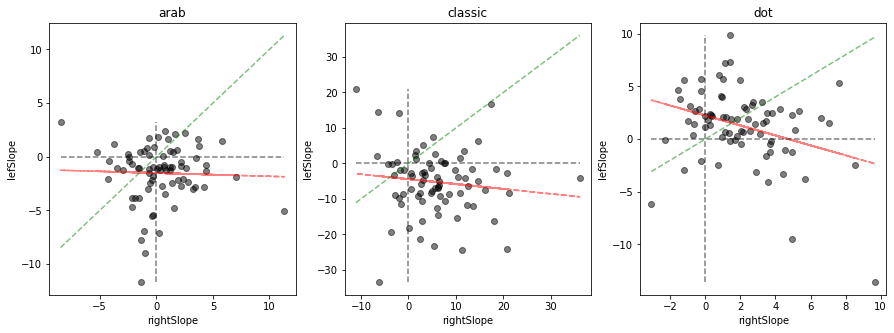

In [34]:
notation = 0
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for p,x,y,cl,lx,ly in zip(range(3),
            [het_results[:,0,2,1],het_results[:,1,2,1],het_results[:,2,2,1]],
            [het_results[:,0,3,1],het_results[:,1,3,1],het_results[:,2,3,1]],
            condType,
            ["rightSlope", "rightSlope", "rightSlope"],
            ["lefSlope", "lefSlope", "lefSlope"]):
    ax[p].scatter(x,y, color="k", alpha=0.5)
    xT = np.stack((np.ones(len(x)), x), axis=-1)
    reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
    ax[p].plot(x, x*reg[1] + reg[0], "--", color="r", alpha=0.5)
    ax[p].plot([0,0], [np.min(y), np.max(y)], "--", color="k", alpha=0.5)
    ax[p].plot([np.min(x), np.max(x)], [0,0], "--", color="k", alpha=0.5)
    difx = np.linspace(np.min(x), np.max(x),100)
    dify = np.linspace(np.min(y), np.max(y),100)
    ax[p].plot(difx, difx, "--", color="g", alpha=0.5)
    ax[p].set_xlabel(lx)
    ax[p].set_ylabel(ly)
    #ax[p].set_xticks([1,2,3])
    #ax[p].set_xticklabels(condType)
    #ax[p].set_xlim(0.5,3.5)
    ax[p].set_title(cl)
    print(np.corrcoef(x,y)[0,1])
    print(reg)
#ax[ci].legend()
plt.show()

arab
-0.05904271760003915
[ 0.45590617 -0.05850185]
0.05366911269125202
[1.11082    0.06569222]
0.16697059333222405
[1.00794611 0.20626532]


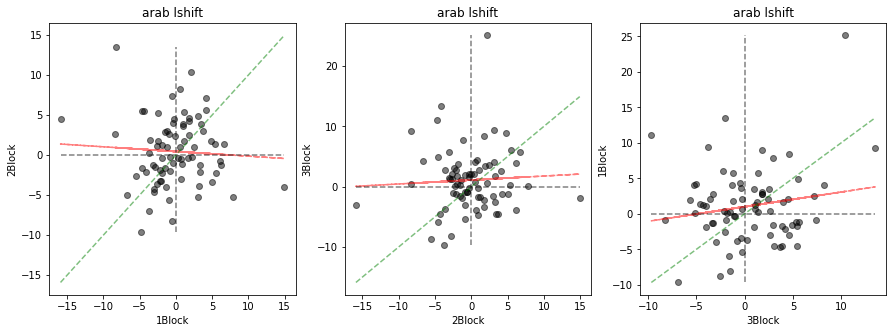

0.12359430284033995
[-1.17250757  0.13193502]
-0.3723406552758463
[-1.31674585 -0.41124942]
-0.08632587579070428
[-0.89062551 -0.08931907]


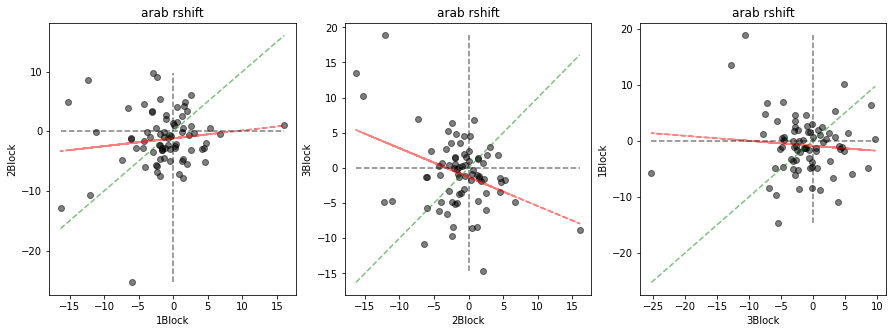

dot
-0.015707007721567714
[ 2.16357858 -0.02133538]
0.09174851838997213
[2.29579392 0.12841511]
0.1513742986870777
[2.10231463 0.15597759]


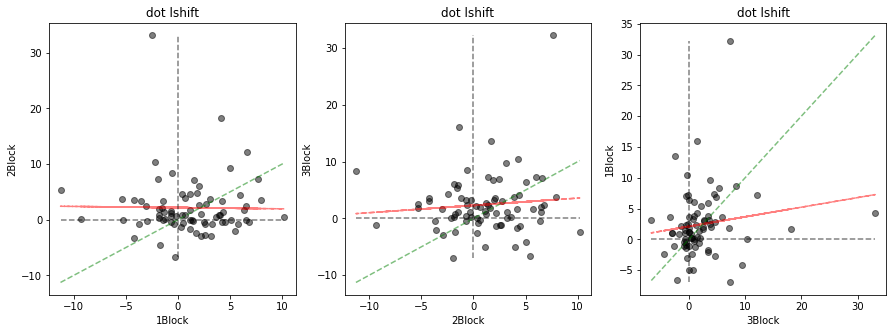

0.024795556156227038
[0.72970637 0.03987953]
0.01945210269519477
[1.36177426 0.03964921]
0.16755224077996642
[1.24063116 0.21234502]


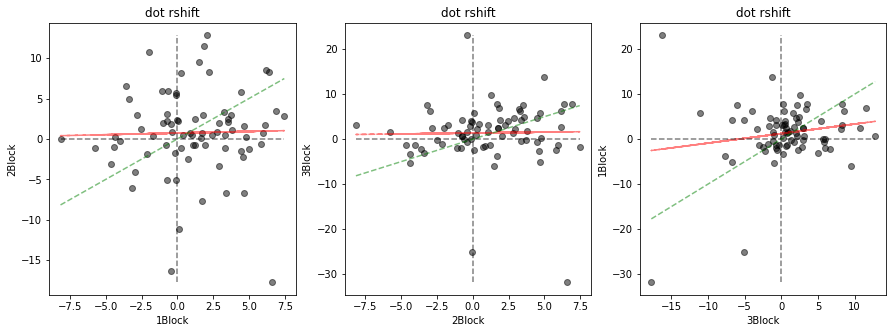

In [42]:

for ci in range(len(condType)):
    if ci!=1:
        print(condType[ci])
        for si,s in zip([2,3],["lshift","rshift"]):
            fig, ax = plt.subplots(1,3, figsize=(15, 5))
            for p,x,y,lx,ly in zip(range(3),
                        [split_het_results[:,ci,0,si,1],split_het_results[:,ci,0,si,1],split_het_results[:,ci,1,si,1]],
                        [split_het_results[:,ci,1,si,1],split_het_results[:,ci,2,si,1],split_het_results[:,ci,2,si,1]],
                        ["1Block", "2Block", "3Block"],
                        ["2Block", "3Block", "1Block"]):
                ax[p].scatter(x,y, color="k", alpha=0.5)
                xT = np.stack((np.ones(len(x)), x), axis=-1)
                reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
                ax[p].plot(x, x*reg[1] + reg[0], "--", color="r", alpha=0.5)
                ax[p].plot([0,0], [np.min(y), np.max(y)], "--", color="k", alpha=0.5)
                ax[p].plot([np.min(x), np.max(x)], [0,0], "--", color="k", alpha=0.5)
                difx = np.linspace(np.min(x), np.max(x),100)
                dify = np.linspace(np.min(y), np.max(y),100)
                ax[p].plot(difx, difx, "--", color="g", alpha=0.5)
                ax[p].set_xlabel(lx)
                ax[p].set_ylabel(ly)
                #ax[p].set_xticks([1,2,3])
                #ax[p].set_xticklabels(condType)
                #ax[p].set_xlim(0.5,3.5)
                ax[p].set_title(condType[ci]+" "+s)
                print(np.corrcoef(x,y)[0,1])
                print(reg)
            #ax[ci].legend()
            plt.show()

# Errors

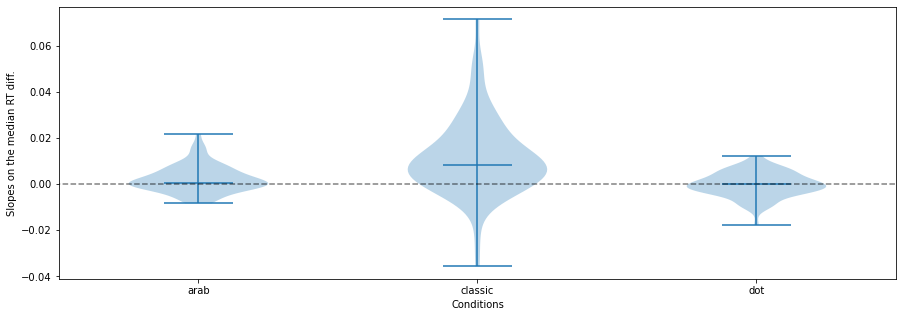

Ttest_1sampResult(statistic=3.294559568781783, pvalue=0.001498907337872651) Ttest_1sampResult(statistic=6.1074054909979525, pvalue=3.988264673299991e-08) Ttest_1sampResult(statistic=-0.3539066975337286, pvalue=0.7243887622059557)
Ttest_1sampResult(statistic=2.018946449477571, pvalue=0.04732440180228897)
Ttest_1sampResult(statistic=7.544046427843627, pvalue=1.3618926083740271e-10)
Ttest_1sampResult(statistic=0.02548026387878436, pvalue=0.979739565298231)


In [35]:

notation = 1
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.violinplot([diff_results[:,0,notation,1],diff_results[:,1,notation,1],diff_results[:,2,notation,1]], showmedians=True, showextrema=True)
ax.plot([0,1,2,3,4],[0,0,0,0,0], "--", color="k", alpha=0.5)
ax.set_xlabel("Conditions")
ax.set_ylabel("Slopes on the median RT diff.")
ax.set_xticks([1,2,3])
ax.set_xticklabels(condType)
ax.set_xlim(0.5,3.5)
#ax[ci].legend()
plt.show()
print(ttest_1samp(diff_results[:,0,notation,1],0),ttest_1samp(diff_results[:,1,notation,1],0),ttest_1samp(diff_results[:,2,notation,1],0))
# excluding outliers
thr = 2.5
for ci,c in enumerate(condType):
    med = np.median(diff_results[:,ci,notation,1])
    MAD = thr*np.median(np.abs(diff_results[:,ci,notation,1] - med)) / 0.6744897501960817
    y = diff_results[(diff_results[:,ci,notation,1] < (med + MAD)) & (diff_results[:,ci,notation,1] > (med - MAD)),ci,notation,1]
    print(ttest_1samp(y,0))

0.0913634477152319
[0.01093587 0.25846733]
0.05110435745936755
[-0.00040734  0.01659514]
-0.04968210472032995
[ 0.00218166 -0.05408088]


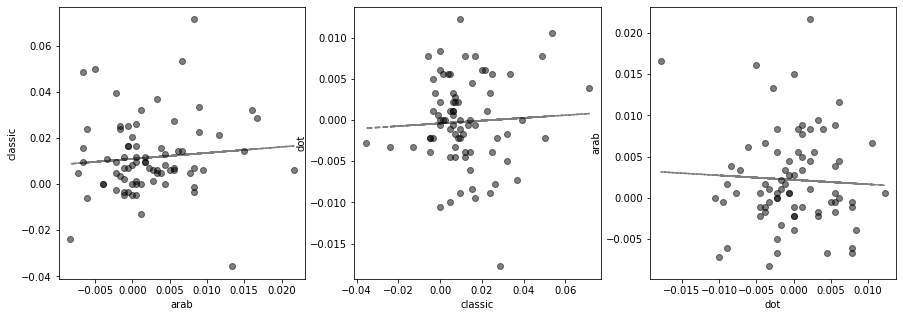

In [36]:
notation = 1
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for p,x,y,lx,ly in zip(range(3),
            [diff_results[:,0,notation,1],diff_results[:,1,notation,1],diff_results[:,2,notation,1]],
            [diff_results[:,1,notation,1],diff_results[:,2,notation,1],diff_results[:,0,notation,1]],
            condType,
            [condType[1],condType[2],condType[0]]):
    ax[p].scatter(x,y, color="k", alpha=0.5)
    xT = np.stack((np.ones(len(x)), x), axis=-1)
    reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
    ax[p].plot(x, x*reg[1] + reg[0], "--", color="k", alpha=0.5)
    ax[p].set_xlabel(lx)
    ax[p].set_ylabel(ly)
    #ax[p].set_xticks([1,2,3])
    #ax[p].set_xticklabels(condType)
    #ax[p].set_xlim(0.5,3.5)
    print(np.corrcoef(x,y)[0,1])
    print(reg)
#ax[ci].legend()
plt.show()

-0.09835599805914848
[ 0.00124345 -0.0971464 ]
-0.4862985675043374
[ 0.00332769 -0.60231914]
0.048064240897399246
[-0.00021645  0.04917582]


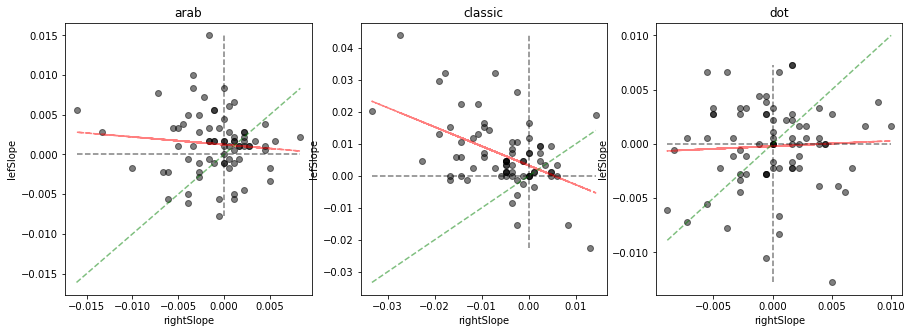

In [37]:

notation = 0
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for p,x,y,cl,lx,ly in zip(range(3),
            [het_results[:,0,0,1],het_results[:,1,0,1],het_results[:,2,0,1]],
            [het_results[:,0,1,1],het_results[:,1,1,1],het_results[:,2,1,1]],
            condType,
            ["rightSlope", "rightSlope", "rightSlope"],
            ["lefSlope", "lefSlope", "lefSlope"]):
    ax[p].scatter(x,y, color="k", alpha=0.5)
    xT = np.stack((np.ones(len(x)), x), axis=-1)
    reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
    ax[p].plot(x, x*reg[1] + reg[0], "--", color="r", alpha=0.5)
    ax[p].plot([0,0], [np.min(y), np.max(y)], "--", color="k", alpha=0.5)
    ax[p].plot([np.min(x), np.max(x)], [0,0], "--", color="k", alpha=0.5)
    difx = np.linspace(np.min(x), np.max(x),100)
    dify = np.linspace(np.min(y), np.max(y),100)
    ax[p].plot(difx, difx, "--", color="g", alpha=0.5)
    ax[p].set_xlabel(lx)
    ax[p].set_ylabel(ly)
    #ax[p].set_xticks([1,2,3])
    #ax[p].set_xticklabels(condType)
    #ax[p].set_xlim(0.5,3.5)
    ax[p].set_title(cl)
    print(np.corrcoef(x,y)[0,1])
    print(reg)
#ax[ci].legend()
plt.show()

arab
0.21220337797595926
[-0.00145738  0.1854578 ]
0.059298615683470064
[-0.00089475  0.07363658]
0.2568076770699856
[-3.64122490e-04  3.64891898e-01]


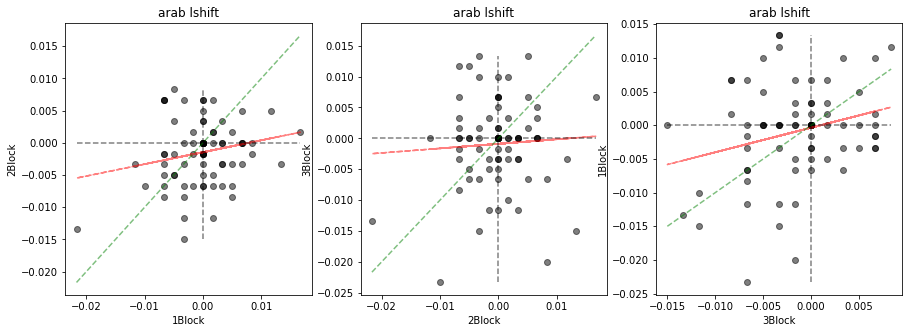

-0.17014692945408044
[ 0.0014759  -0.14581882]
0.13382838229840438
[0.00119367 0.10876887]
0.06648333449200032
[0.00126147 0.06304922]


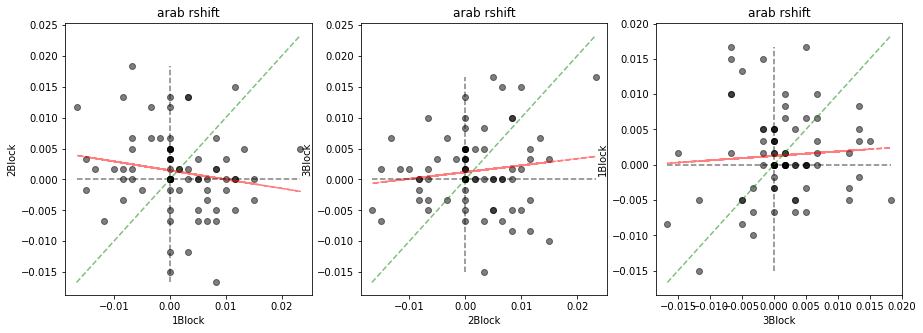

dot
-0.05968959710669462
[-0.00014624 -0.06545662]
0.0949246235426083
[-0.00028076  0.103736  ]
0.17977139648206358
[-0.00020707  0.17914977]


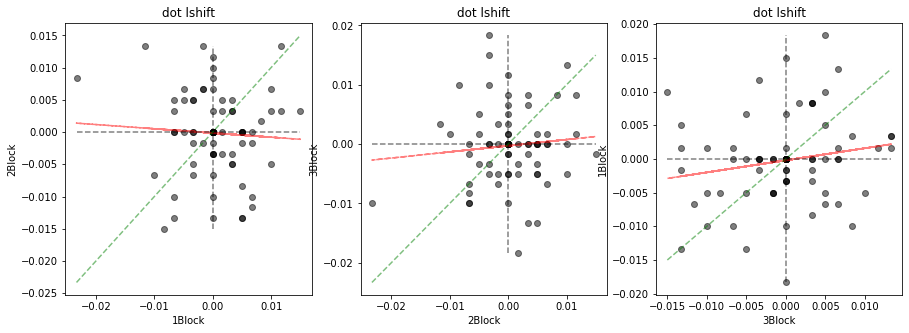

-0.06182203979993944
[ 0.00085405 -0.06788961]
0.041185342245091794
[-0.00133431  0.04436074]
0.03875262351948122
[-0.0013749   0.03800995]


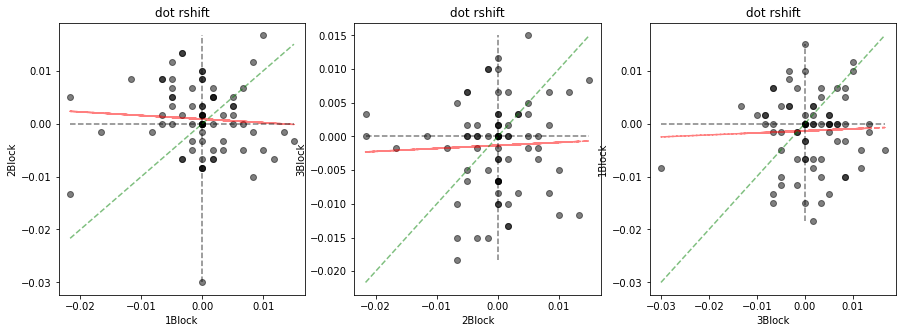

In [41]:
for ci in range(len(condType)):
    if ci!=1:
        print(condType[ci])
        for si,s in enumerate(["lshift","rshift"]):
            fig, ax = plt.subplots(1,3, figsize=(15, 5))
            for p,x,y,lx,ly in zip(range(3),
                        [split_het_results[:,ci,0,si,1],split_het_results[:,ci,0,si,1],split_het_results[:,ci,1,si,1]],
                        [split_het_results[:,ci,1,si,1],split_het_results[:,ci,2,si,1],split_het_results[:,ci,2,si,1]],
                        ["1Block", "2Block", "3Block"],
                        ["2Block", "3Block", "1Block"]):
                ax[p].scatter(x,y, color="k", alpha=0.5)
                xT = np.stack((np.ones(len(x)), x), axis=-1)
                reg = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xT),xT)),np.transpose(xT)), y)
                ax[p].plot(x, x*reg[1] + reg[0], "--", color="r", alpha=0.5)
                ax[p].plot([0,0], [np.min(y), np.max(y)], "--", color="k", alpha=0.5)
                ax[p].plot([np.min(x), np.max(x)], [0,0], "--", color="k", alpha=0.5)
                difx = np.linspace(np.min(x), np.max(x),100)
                dify = np.linspace(np.min(y), np.max(y),100)
                ax[p].plot(difx, difx, "--", color="g", alpha=0.5)
                ax[p].set_xlabel(lx)
                ax[p].set_ylabel(ly)
                #ax[p].set_xticks([1,2,3])
                #ax[p].set_xticklabels(condType)
                #ax[p].set_xlim(0.5,3.5)
                ax[p].set_title(condType[ci]+" "+s)
                print(np.corrcoef(x,y)[0,1])
                print(reg)
            #ax[ci].legend()
            plt.show()